# Implementing an Incubator Controller Service

In this tutorial you will deploy a state machine implementing a controller service, that controls the incubator temperature.

## Preliminaries and Dependencies

In [1]:
# Configure python path to load incubator modules
import sys
import os

# Get the current working directory. Should be 2-Controller-Modelling
current_dir = os.getcwd()

assert os.path.basename(current_dir) == '2-Controller-Modelling', 'Current directory is not 2-Controller-Modelling'

# Get the parent directory. Should be the root of the repository
parent_dir = os.path.dirname(current_dir)

# The root of the repo should contain the incubator_dt folder. Otherwise something went wrong in 0-Pre-requisites.
assert os.path.exists(os.path.join(parent_dir, 'incubator_dt')), 'incubator_dt folder not found in the repository root'

incubator_dt_software_dir = os.path.join(parent_dir, 'incubator_dt', 'software')

assert os.path.exists(incubator_dt_software_dir), 'incubator_dt software directory not found'

# Add the parent directory to sys.path
sys.path.append(incubator_dt_software_dir)

We start by writing out a logging configuration, to enable logging.

In [5]:
%%writefile logging.conf
[loggers]
keys=root,ControllerService

[handlers]
keys=consoleHandler,ControllerServiceFileHandler

[formatters]
keys=simpleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[logger_ControllerService]
level=DEBUG
handlers=consoleHandler,ControllerServiceFileHandler
qualname=ControllerService
propagate=0

[handler_consoleHandler]
class=StreamHandler
formatter=simpleFormatter
args=(sys.stdout,)

[handler_ControllerServiceFileHandler]
class=FileHandler
formatter=simpleFormatter
args=('ControllerService.log', 'w')

[formatter_simpleFormatter]
format=%(asctime)s.%(msecs)03d %(levelname)s %(name)s : %(message)s
datefmt=%Y-%m-%d %H:%M:%S

Overwriting logging.conf


And we need to start the incubator services, by running the following script, which is based on [start_all_services.py](../incubator_dt/software/startup/start_all_services.py) but only starts the incubator driver. No controller is started.

In [3]:
%%writefile start_incubator.py
# Configure python path to load incubator modules
import sys
import os
from collections import deque

# Get the current working directory. Should be 2-Controller-Modelling
current_dir = os.getcwd()

assert os.path.basename(current_dir) == '2-Controller-Modelling', 'Current directory is not 2-Controller-Modelling'

# Get the parent directory. Should be the root of the repository
parent_dir = os.path.dirname(current_dir)

# The root of the repo should contain the incubator_dt folder. Otherwise something went wrong in 0-Pre-requisites.
assert os.path.exists(os.path.join(parent_dir, 'incubator_dt')), 'incubator_dt folder not found in the repository root'

incubator_dt_software_dir = os.path.join(parent_dir, 'incubator_dt', 'software')

assert os.path.exists(incubator_dt_software_dir), 'incubator_dt software directory not found'

# Add the parent directory to sys.path
sys.path.append(incubator_dt_software_dir)

# Append the same path to PYTHONPATH
os.environ['PYTHONPATH'] = os.pathsep.join([os.environ.get('PYTHONPATH', ''), incubator_dt_software_dir])

from startup.start_docker_influxdb import start_docker_influxdb
from startup.start_docker_rabbitmq import start_docker_rabbitmq
from startup.start_incubator_realtime_mockup import start_incubator_realtime_mockup
from startup.start_influx_data_recorder import start_influx_data_recorder
from startup.start_low_level_driver_mockup import start_low_level_driver_mockup
from startup.utils.start_as_daemon import start_as_daemon

if __name__ == '__main__':
    start_docker_rabbitmq()
    start_docker_influxdb()

    start_as_daemon(start_incubator_realtime_mockup)
    start_as_daemon(start_low_level_driver_mockup)
    start_as_daemon(start_influx_data_recorder)

Overwriting start_incubator.py


Open a terminal and run: `python start_incubator.py`.
You should see an output like the following. Leaving it running and move to the next cell.

```log
Searching for container with the name: rabbitmq-server
Container status: running
Container is running. Issuing kill request.
exited
Log will be stored in: C:\work\github\IncubatorDTCourse\2-Controller-Modelling\logs\rabbitmq.log
Running docker-compose command: docker compose up --detach --build
[+] Running 1/1
 ✔ Container rabbitmq-server  Started0.3s
docker-compose successful.
Service is not ready yet. Attempts remaining:9
Service is not ready yet. Attempts remaining:8
Service is not ready yet. Attempts remaining:7
Service is not ready yet. Attempts remaining:6
Service is not ready yet. Attempts remaining:5
Service is not ready yet. Attempts remaining:4
RabbitMQ ready:
 {"management_version":"3.12.9","rates_mode":"basic","sample_retention_policies":{"global":[600,3600,28800,86400],"basic":[600,3600],"detailed":[600]},"exchange_types":[{"name":"direct","description":"AMQP direct exchange, as per the AMQP specification","enabled":true},{"name":"fanout","description":"AMQP fanout exchange, as per the AMQP specification","enabled":true},{"name":"headers","description":"AMQP headers exchange, as per the AMQP specification","enabled":true},{"name":"topic","description":"AMQP topic exchange, as per the AMQP specification","enabled":true},{"name":"x-federation-upstream","description":"Federation upstream helper exchange","internal_purpose":"federation","enabled":true}],"product_version":"3.12.9","product_name":"RabbitMQ","rabbitmq_version":"3.12.9","cluster_name":"rabbit@c8ca4b9eca67","erlang_version":"25.3.2.7","erlang_full_version":"Erlang/OTP 25 [erts-13.2.2.4] [source] [64-bit] [smp:16:16] [ds:16:16:10] [async-threads:1] [jit:ns]","release_series_support_status":"supported","disable_stats":false,"is_op_policy_updating_enabled":true,"enable_queue_totals":false,"message_stats":{},"churn_rates":{},"queue_totals":{},"object_totals":{"channels":0,"connections":0,"consumers":0,"exchanges":7,"queues":0},"statistics_db_event_queue":0,"node":"rabbit@c8ca4b9eca67","listeners":[{"node":"rabbit@c8ca4b9eca67","protocol":"amqp","ip_address":"::","port":5672,"socket_opts":{"backlog":128,"nodelay":true,"linger":[true,0],"exit_on_close":false}},{"node":"rabbit@c8ca4b9eca67","protocol":"clustering","ip_address":"::","port":25672,"socket_opts":[]},{"node":"rabbit@c8ca4b9eca67","protocol":"http","ip_address":"::","port":15672,"socket_opts":{"cowboy_opts":{"sendfile":false},"port":15672}},{"node":"rabbit@c8ca4b9eca67","protocol":"http/prometheus","ip_address":"::","port":15692,"socket_opts":{"cowboy_opts":{"sendfile":false},"port":15692,"protocol":"http/prometheus"}},{"node":"rabbit@c8ca4b9eca67","protocol":"mqtt","ip_address":"::","port":1883,"socket_opts":{"backlog":128,"nodelay":true,"send_timeout":15000,"send_timeout_close":true}},{"node":"rabbit@c8ca4b9eca67","protocol":"stomp","ip_address":"::","port":61613,"socket_opts":{"backlog":128,"nodelay":true}}],"contexts":[]}
Service is ready
Searching for container with the name: influxdb-server
Container status: running
Container is running. Issuing kill request.
exited
Log will be stored in: C:\work\github\IncubatorDTCourse\2-Controller-Modelling\logs\influxdb.log
Running docker-compose command: docker compose up --detach --build
[+] Running 1/1
 ✔ Container influxdb-server  Started0.3s  
docker-compose successful.
Service is not ready yet. Attempts remaining:9
Service is not ready yet. Attempts remaining:8
Service is not ready yet. Attempts remaining:7
InfluxDB ready:
 {"name":"influxdb", "message":"ready for queries and writes", "status":"pass", "checks":[], "version": "2.0.3", "commit": "fe04d346df"}

Service is ready
2024-10-20 13:22:44.247 INFO RabbitMQClass : Bound incubator.mock.hw.heater.on--> amq.gen-3TpoS9AcrHZe-04dxbocxQ
2024-10-20 13:22:44.251 INFO RabbitMQClass : Bound incubator.mock.hw.box.G--> amq.gen-mOkhUvhUID53UiG1OYdPIQ
start_incubator_realtime_mockup... OK
2024-10-20 13:22:44.926 INFO RabbitMQClass : Bound incubator.mock.hw.temperature.t1--> amq.gen-iQd2iiptgTHUtbDNo1jq3w
2024-10-20 13:22:44.986 INFO RabbitMQClass : Bound incubator.mock.hw.temperature.t2--> amq.gen-0cmU_5hKMoWyzK4iHiSj5w
2024-10-20 13:22:45.057 INFO RabbitMQClass : Bound incubator.mock.hw.temperature.t3--> amq.gen-KjS9FwDgAQFux1s7s7eIJg
2024-10-20 13:22:45.212 INFO IncubatorDriver : Connected.
2024-10-20 13:22:45.217 INFO RabbitMQClass : Bound incubator.hardware.gpio.fan.on--> amq.gen-srbXT6S-J0TddSbxYnaWng
2024-10-20 13:22:45.221 INFO RabbitMQClass : Bound incubator.hardware.gpio.heater.on--> amq.gen-_12CLobI0y2zoYrVsO9V1Q
start_low_level_driver_mockup... OK
2024-10-20 13:22:45.862 INFO RabbitMQClass : Bound incubator.record.#--> amq.gen-jbjs8AvX7LigcjqghCKTvA
start_influx_data_recorder... OK
```

## Controller State Machine Model in Python FMU

The following controller FMU is given as an example. Note that it is similar to the controller in the previous notebook, with the exception that the temperature dynamics are left out, since those are part of the incubator physical system.

Then the ControllerService is implemented, as a reactive service, reacting to messages sent from the incubator physical system driver (a small piece of code that connects to the incubator sensors and actuators). The controller FMU is used inside the ControllerService.


In [46]:
%%writefile controller.py

# Configure python path to load incubator modules
import sys
import os
import logging
import logging.config
import time
from collections import deque

# Get the current working directory. Should be 2-Controller-Modelling
current_dir = os.getcwd()

assert os.path.basename(current_dir) == '2-Controller-Modelling', 'Current directory is not 2-Controller-Modelling'

# Get the parent directory. Should be the root of the repository
parent_dir = os.path.dirname(current_dir)

# The root of the repo should contain the incubator_dt folder. Otherwise something went wrong in 0-Pre-requisites.
assert os.path.exists(os.path.join(parent_dir, 'incubator_dt')), 'incubator_dt folder not found in the repository root'

incubator_dt_software_dir = os.path.join(parent_dir, 'incubator_dt', 'software')

assert os.path.exists(incubator_dt_software_dir), 'incubator_dt software directory not found'

# Add the parent directory to sys.path
sys.path.append(incubator_dt_software_dir)

import time
import sys
from datetime import datetime
import logging

from incubator.communication.server.rabbitmq import Rabbitmq, ROUTING_KEY_STATE, ROUTING_KEY_HEATER, ROUTING_KEY_FAN, \
    from_ns_to_s
from incubator.communication.shared.protocol import ROUTING_KEY_UPDATE_CLOSED_CTRL_PARAMS
from incubator.models.controller_models.controller_model_sm import ControllerModel4SM

class ControllerFMU:
    """
    A simple implementation of an FMU in Python for co-simulation.
    This FMU represents a thermostat controller with the states: Heating, and Cooling.
    The system adjusts the temperature based on the current room temperature, target temperature, and max temperature.
    """

    def __init__(self, max_temp, min_temp):
        # Initial state
        self.state = "Heating"
        self.heater_on = True
        self.time = 0.0  # Simulation start time

        # Temperature variables
        self.current_temp = 20.0  # Initial room temperature (Celsius)
        self.max_temp = max_temp  # Maximum allowed temperature (Celsius)
        self.min_temp = min_temp  # Minimum allowed temperature (Celsius)

    def fmi2Instantiate(self):
        """
        Simulate the FMU instantiation, which allocates resources and prepares the FMU.
        """
        print("Thermostat FMU instantiated with initial state.")
        self.time = 0.0
        self.state = "Heating"
        self.current_temp = 20.0

    def fmi2SetupExperiment(self, start_time, stop_time):
        """
        Setup the simulation experiment.
        """
        print(f"FMU experiment setup: Start Time = {start_time}, Stop Time = {stop_time}")
        self.time = start_time

    def fmi2EnterInitializationMode(self):
        """
        FMU enters initialization mode. This is where initial conditions would be set.
        """
        print("Thermostat FMU entered initialization mode.")

    def fmi2ExitInitializationMode(self):
        """
        FMU exits initialization mode and is ready to start the simulation.
        """
        print("Thermostat FMU exited initialization mode.")

    def fmi2DoStep(self, current_time, step_size):
        """
        Perform one simulation step. This simulates the thermostat's state machine.
        """
        # Update the simulation time
        self.time = current_time + step_size

        # State machine logic
        if self.state == "Heating":
            if self.current_temp >= self.max_temp:
                self.state = "Cooling" 
                self.heater_on = False

        elif self.state == "Cooling":
            if self.current_temp < self.min_temp:
                self.state = "Heating" 
                self.heater_on = True

        print(f"Time: {self.time:.2f}s, State: {self.state}, Temp: {self.current_temp:.2f}°C")

    def fmi2Terminate(self):
        """
        Terminate the FMU simulation and free resources.
        """
        print("Thermostat FMU simulation terminated.")

class ControllerService:
    def __init__(self, max_temp, min_temp, rabbit_config):
        self._l = logging.getLogger("ControllerService")

        self.time = 0 # ns
        self.heater_ctrl = None
        self.fan_ctrl = None
        self.state_machine = ControllerFMU(max_temp, min_temp)

        self.rabbitmq = Rabbitmq(**rabbit_config)

    def _record_message(self, message):
        self.time = message['time'] # ns
        self.time_step = message['fields']['execution_interval'] # s
        # Sets the input to the FMU
        self.state_machine.current_temp = message['fields']['average_temperature']
    
    def safe_protocol(self):
        self._l.debug("Stopping Fan")
        self.fan_ctrl = False
        self._set_fan_on(False)
        self._l.debug("Stopping Heater")
        self.heater_ctrl = False
        self._set_heater_on(False)

    def _set_heater_on(self, on):
        self.rabbitmq.send_message(routing_key=ROUTING_KEY_HEATER, message={"heater": on})

    def _set_fan_on(self, on):
        self.fan_ctrl = on
        self.rabbitmq.send_message(routing_key=ROUTING_KEY_FAN, message={"fan": on})

    def setup(self):
        self.rabbitmq.connect_to_server()
        self.safe_protocol()
        self.rabbitmq.subscribe(routing_key="incubator.update.dtcourse.controller.parameters",
                                on_message_callback=self.update_parameters)
        self.rabbitmq.subscribe(routing_key=ROUTING_KEY_STATE,
                                on_message_callback=self.control_loop_callback)

        
        self.state_machine.fmi2Instantiate()
        self.state_machine.fmi2SetupExperiment(0, -1)
        self.state_machine.fmi2EnterInitializationMode()
        self.state_machine.fmi2ExitInitializationMode()

        self._l.info("Controller setup complete.")

    def ctrl_step(self):
        self._l.debug("Controller step")
        
        self.fan_ctrl = True
        time_seconds = from_ns_to_s(self.time)
        self.state_machine.fmi2DoStep(time_seconds, self.time_step)
        self.heater_ctrl = self.state_machine.heater_on
        self._l.debug(f"Controller step done. Time(ns): {self.time}, Heater: {self.heater_ctrl}, Fan: {self.fan_ctrl}, Temp: {self.state_machine.current_temp}, State: {self.state_machine.state}")

    def cleanup(self):
        self.safe_protocol()
        self.rabbitmq.close()

    def upload_state(self, data):
        ctrl_data = {
            "measurement": "dtcourse_controller",
            "time": self.time,
            "tags": {
                "source": "dtcourse_controller"
            },
            "fields": {
                "plant_time": data["time"],
                "heater_on": 1 if self.heater_ctrl else 0,
                "fan_on": 1 if data["fields"]["fan_on"] else 0,
                "current_state": self.state_machine.state,
                "max_temperature": self.state_machine.max_temp,
                "min_temperature": self.state_machine.min_temp,
            }
        }
        self.rabbitmq.send_message(routing_key="incubator.record.dtcourse.controller.state", message=ctrl_data)

    def update_parameters(self, ch, method, properties, body_json):
        self._l.debug("New parameter msg:")
        self._l.debug(body_json)
        if "max_temp" in body_json:
            self.state_machine.max_temp = body_json["max_temp"]
        if "min_temp" in body_json:
            self.state_machine.min_temp = body_json["min_temp"]
        

    def control_loop_callback(self, ch, method, properties, body_json):
        self._record_message(body_json)

        self.ctrl_step()

        self.upload_state(body_json)

        assert self.heater_ctrl is not None
        self._set_heater_on(self.heater_ctrl)
        self._set_fan_on(self.fan_ctrl)

    def start_control(self):
        try:
            self.rabbitmq.start_consuming()
        except:
            self._l.warning("Stopping controller")
            self.cleanup()
            raise

if __name__ == "__main__":
    # Get utility functions to config logging and load configuration
    from incubator.config.config import load_config
    from pyhocon import ConfigFactory
    
    # Get logging configuration
    logging.config.fileConfig("logging.conf")

    # Get path to the startup.conf file used in the incubator dt:
    startup_conf = os.path.join(os.path.dirname(os.getcwd()), 'incubator_dt', 'software','startup.conf')
    assert os.path.exists(startup_conf), 'startup.conf file not found'

    # The startup.conf comes from the incubator dt repository.
    config = ConfigFactory.parse_file(startup_conf)

    max_temp=39.0
    min_temp=36.0

    controller = ControllerService(max_temp, min_temp, rabbit_config=config["rabbitmq"])
    controller.setup()
    controller.start_control()

Overwriting controller.py


In [47]:
import subprocess
import time

# Start a process asynchronously
controller_service_proc = subprocess.Popen(["python", "controller.py"])

# Wait for 5 seconds for the process to start
time.sleep(5)

# Print the PID of the process. You can search for this in your task manager to see the process running and kill it if necessary.
print(f"controller_service = {controller_service_proc.pid}")

controller_service = 26788


In [48]:
# Print contents of log file to verify that the service is running
with open('ControllerService.log', 'r') as f:
    print(f.read())

# Check if the process is still running
assert controller_service_proc.poll() is None

2024-10-20 15:29:27.164 DEBUG ControllerService : Stopping Fan
2024-10-20 15:29:27.165 DEBUG ControllerService : Stopping Heater
2024-10-20 15:29:27.209 INFO ControllerService : Controller setup complete.
2024-10-20 15:29:29.463 DEBUG ControllerService : Controller step
2024-10-20 15:29:29.463 DEBUG ControllerService : Controller step done. Time(ns): 1729430969418105200, Heater: False, Fan: True, Temp: 39.16140722221852, State: Cooling



While the controller is running, spend some time in the time series database management page (username and password are given in the incubator DT documentation), and create a dashboard like the following:
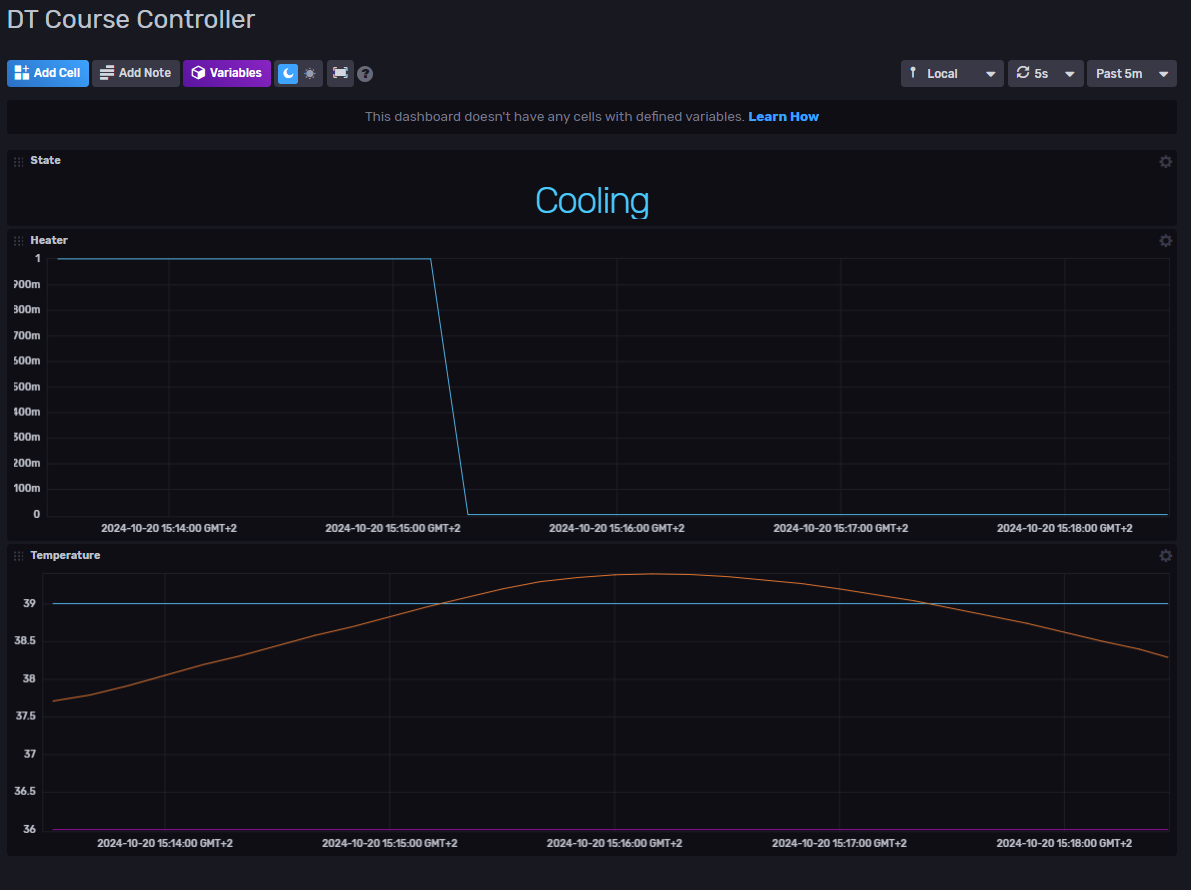

The following are the queries needed:

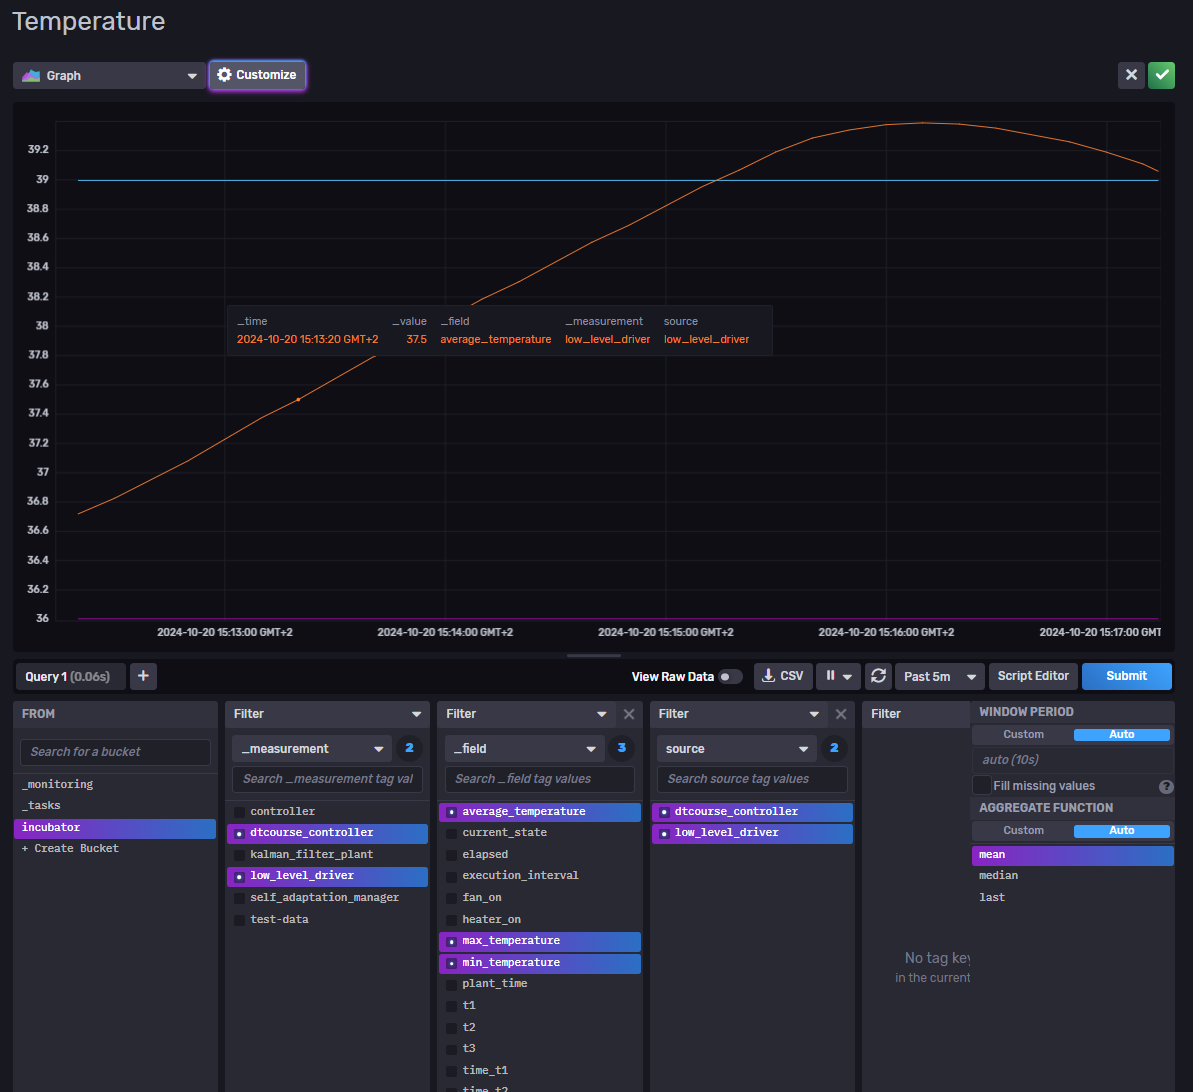

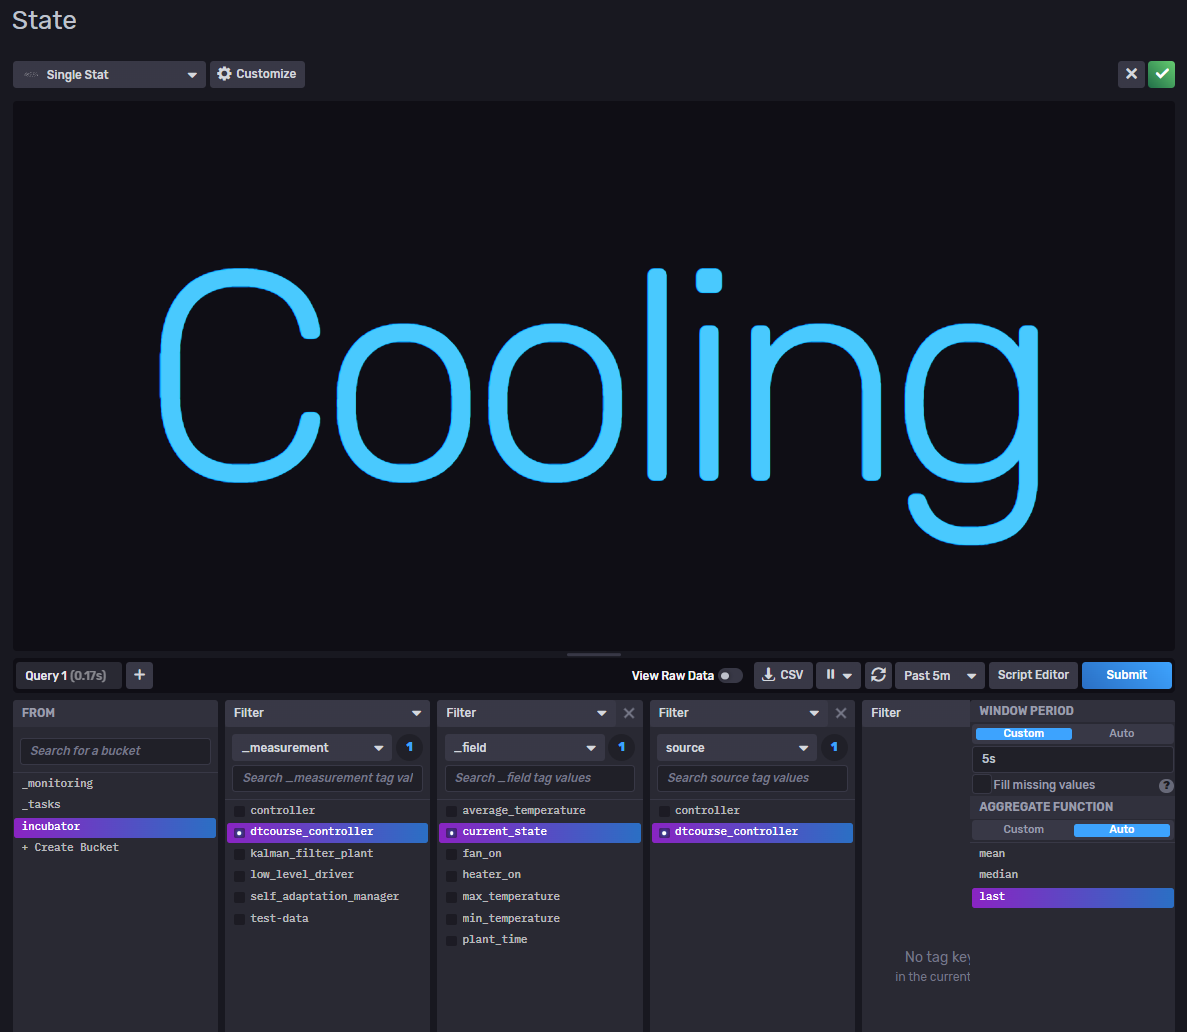

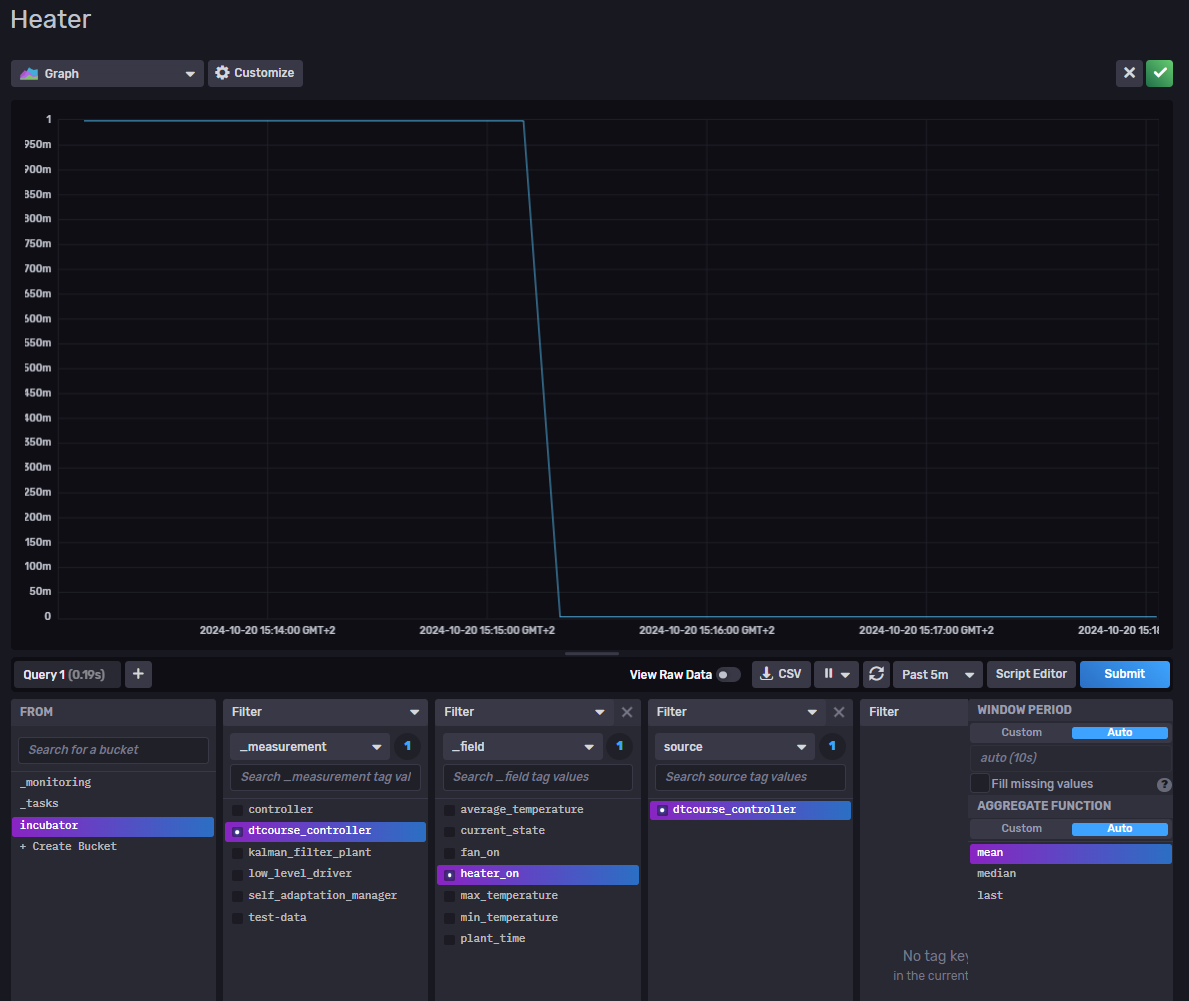

You can import the dashboard into influx db from the following [dashboard json](dt_course_controller.json)

Now let us send a message to reconfigure the controller parameters:

In [49]:
# Import Rabbitmq class from incubator, which makes connecting to RabbitMQ easier
from incubator.communication.server.rabbitmq import Rabbitmq
from pyhocon import ConfigFactory

# Get config
startup_conf = os.path.join(os.path.dirname(os.getcwd()), 'incubator_dt', 'software','startup.conf')
config = ConfigFactory.parse_file(startup_conf)

new_max_temp = 45.0
new_min_temp = 40.0

# Send a message to the PT to simulate the lid opening by a factor
with Rabbitmq(**config["rabbitmq"]) as rabbitmq:
    rabbitmq.send_message("incubator.update.dtcourse.controller.parameters", {"max_temp": new_max_temp, "min_temp": new_min_temp})

# Wait a bit for the message to be processed
time.sleep(5)

Back in the influxdb page, you should see the following change:

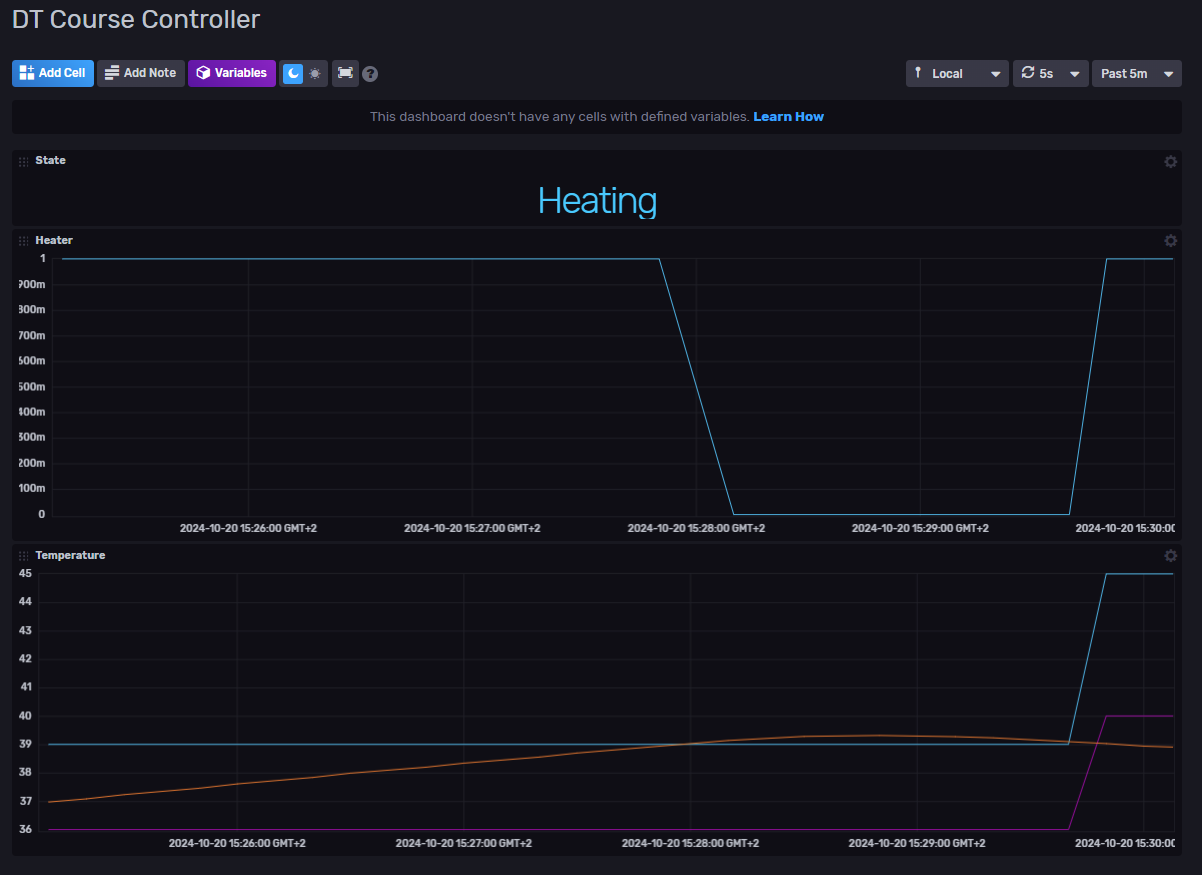

In [50]:
controller_service_proc.terminate() # Terminate the process. Send SIGTERM signal to the process. The process can catch this signal and perform cleanup operations before exiting, so we wait.
controller_service_proc.wait()  # Wait for the process to exit fully. Should print exit code 1, due to interruption.

# Ensure process has exited
assert controller_service_proc.returncode is not None, 'Process has not exited'